# Lending Club Study

## Name : Smita Gopal Savant


In [48]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#Read loan CSV files
loan_df = pd.read_csv("loan.csv", dtype=object)

In [50]:
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [51]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [52]:
loan_df.shape

(39717, 111)

In [53]:
loan_df.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object

# Data Cleaning

In [54]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [55]:
#Empty Rows
print(F"Empty Rows = {loan_df.isnull().all(axis=1).sum()}")

#Empty Columns
print(F"Empty Columns = {loan_df.isnull().all(axis=0).sum()}")

Empty Rows = 0
Empty Columns = 54


In [56]:
#Dropping columns with null values
loan_df.drop(loan_df.iloc[:,53:105], inplace = True, axis = 1)

In [57]:
loan_df.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [58]:
#Drop columns mostly with null values

drop_columns_list = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","mths_since_last_major_derog","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]

loan_df.drop(labels=drop_columns_list, axis=1, inplace=True)

In [59]:
print(F"Dataframe Shape = {loan_df.shape}")
print("------------------------------------------")
print(F"Dataframe Information = {loan_df.info()}")

Dataframe Shape = (39717, 50)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  object
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_title                   37258 non-null  object
 11  emp_length                  38642 non-null  object
 12  home_ownership              3

In [60]:
#Empty Rows
print(F"Empty Rows = {loan_df.isnull().all(axis=1).sum()}")

#Empty Columns
print(F"Empty Columns = {loan_df.isnull().all(axis=0).sum()}")

Empty Rows = 0
Empty Columns = 0


In [61]:
#Drop Not required columns 

drop_columns_list2 = ["member_id","tax_liens","emp_title","zip_code","url"]

loan_df.drop(labels=drop_columns_list2, axis=1, inplace=True)

In [62]:
loan_df.shape

(39717, 45)

In [63]:
loan_df["emp_length"]

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [64]:
#Formatting emp_length column to have only numeric data

loan_df["emp_length"].fillna('0', inplace=True)

In [65]:
loan_df["emp_length"] = loan_df["emp_length"].str.extract('(\d+)')

In [66]:
loan_df.emp_length.head(5)

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [67]:
#Cleaning pub_rec_bankruptcies column

loan_df["pub_rec_bankruptcies"].isnull().sum()

697

In [68]:
loan_df["pub_rec_bankruptcies"].fillna('Not Known',inplace=True)

In [69]:
loan_df["pub_rec_bankruptcies"].isnull().sum()

0

In [70]:
loan_df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

In [71]:
#Cleaning revol_util column
loan_df.revol_util = loan_df.revol_util.str.rstrip('%')

In [72]:
#Cleaning int_rate column
loan_df.int_rate = loan_df.int_rate.str.rstrip('%')

In [73]:
loan_df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69,67.79,B,B5,1,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [74]:
#converting columns data into numeric data

columns = ["loan_amnt","funded_amnt","int_rate","funded_amnt_inv","installment",
          "annual_inc","dti","emp_length","total_pymnt"]

loan_df[columns] = loan_df[columns].apply(pd.to_numeric)

### Loan Status Observation

In [75]:
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [76]:
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

## Derived Year and Month Columns

In [77]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [78]:
loan_df['year'] = loan_df['issue_d'].dt.year
loan_df['month'] = loan_df['issue_d'].dt.month

In [79]:
loan_df.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,2011,12


## Univariate Analysis

In [80]:
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

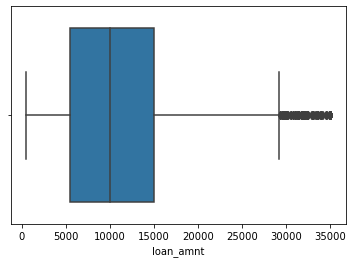

In [81]:
sns.boxplot(loan_df['loan_amnt'])

In [82]:
loan_df['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_pymnt'>

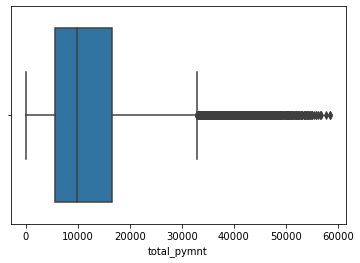

In [83]:
sns.boxplot(loan_df['total_pymnt'])

In [84]:
loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [85]:
#Removing outliers

loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]

loan_df['annual_inc'].describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

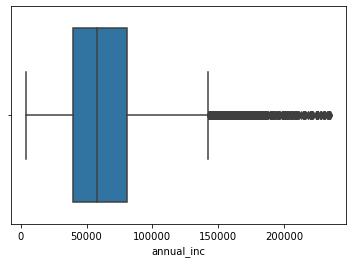

In [86]:
sns.boxplot(loan_df['annual_inc'])

In [87]:
loan_df['int_rate'].describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

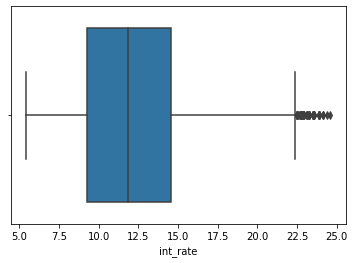

In [88]:
sns.boxplot(loan_df['int_rate'])

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` vari

Text(0.5, 0, 'Funded amount Inv')

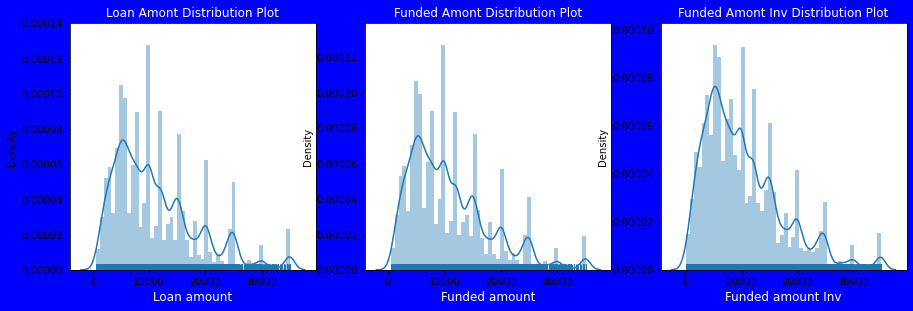

In [89]:
plt.figure(figsize=(15,10),facecolor='b')

#subplot 1
plt.subplot(2,3,1)
plt_loan_amnt = sns.distplot(loan_df.loan_amnt,rug=True)
plt_loan_amnt.set_title("Loan Amont Distribution Plot", fontsize=12,color='white')
plt_loan_amnt.set_xlabel("Loan amount", fontsize=12,color='white')

#subplot 2
plt.subplot(2,3,2)
plt_funded_amnt = sns.distplot(loan_df.funded_amnt,rug=True)
plt_funded_amnt.set_title("Funded Amont Distribution Plot", fontsize=12,color='white')
plt_funded_amnt.set_xlabel("Funded amount", fontsize=12,color='white')

#subplot 3
plt.subplot(2,3,3)
plt_funded_amnt_inv = sns.distplot(loan_df.funded_amnt_inv,rug=True)
plt_funded_amnt_inv.set_title("Funded Amont Inv Distribution Plot", fontsize=12,color='white')
plt_funded_amnt_inv.set_xlabel("Funded amount Inv", fontsize=12,color='white')

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Loan amount')

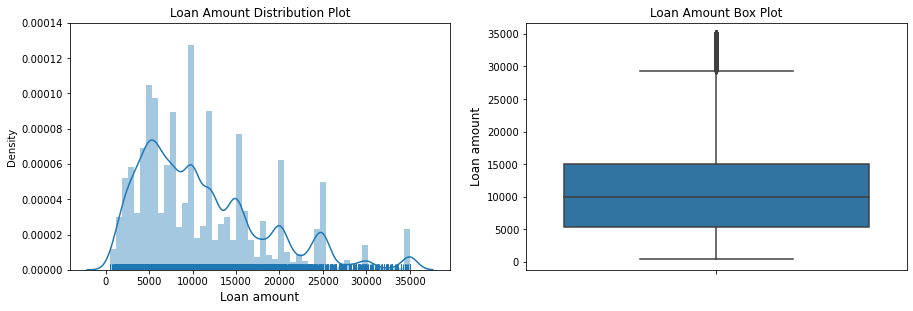

In [90]:
plt.figure(figsize=(15,10))

#subplot 1
plt.subplot(2,2,1)
dstplt_loan_amnt = sns.distplot(loan_df.loan_amnt,rug=True)
dstplt_loan_amnt.set_title("Loan Amount Distribution Plot", fontsize=12)
dstplt_loan_amnt.set_xlabel("Loan amount", fontsize=12)

#subplot 2
plt.subplot(2,2,2)
bxplt_loan_amnt = sns.boxplot(y=loan_df.loan_amnt)
bxplt_loan_amnt.set_title("Loan Amount Box Plot", fontsize=12)
bxplt_loan_amnt.set_ylabel("Loan amount", fontsize=12)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


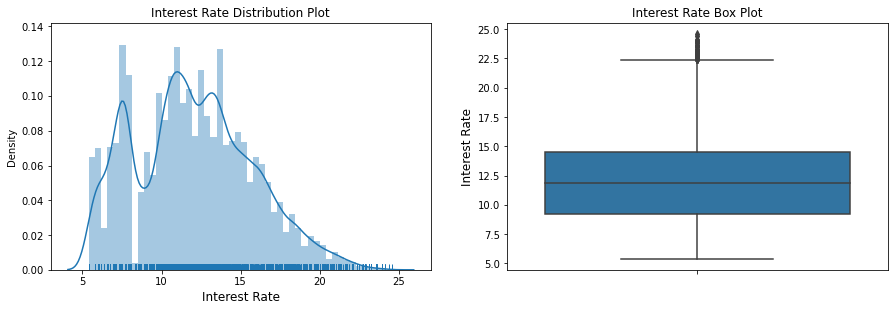

In [91]:
plt.figure(figsize=(15,10))

#subplot 1
plt.subplot(2,2,1)
dstplt_int_rate = sns.distplot(loan_df.int_rate,rug=True)
dstplt_int_rate.set_title("Interest Rate Distribution Plot", fontsize=12)
dstplt_int_rate.set_xlabel("Interest Rate", fontsize=12)

#subplot 2
plt.subplot(2,2,2)
bxplt_int_rate = sns.boxplot(y=loan_df.int_rate)
bxplt_int_rate.set_title("Interest Rate Box Plot", fontsize=12)
bxplt_int_rate.set_ylabel("Interest Rate", fontsize=12)

plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


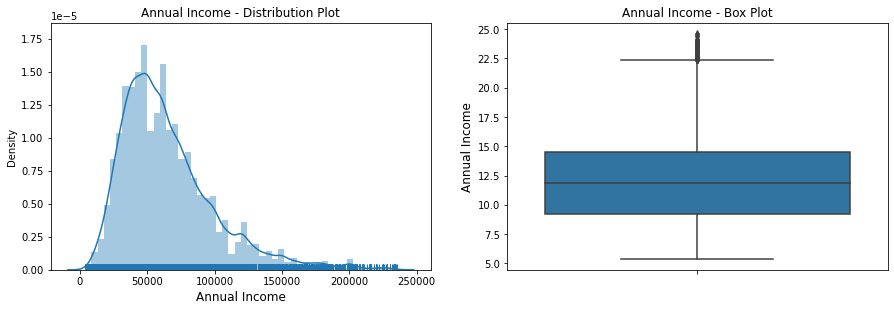

In [92]:
plt.figure(figsize=(15,10))

#subplot 1
plt.subplot(2,2,1)
dstplt_annual_inc = sns.distplot(loan_df.annual_inc,rug=True)
dstplt_annual_inc.set_title("Annual Income - Distribution Plot", fontsize=12)
dstplt_annual_inc.set_xlabel("Annual Income", fontsize=12)

#subplot 2
plt.subplot(2,2,2)
bxplt_annual_inc = sns.boxplot(y=loan_df.int_rate)
bxplt_annual_inc.set_title("Annual Income - Box Plot", fontsize=12)
bxplt_annual_inc.set_ylabel("Annual Income", fontsize=12)

plt.show()

### Univariate Analysis - Loan Status

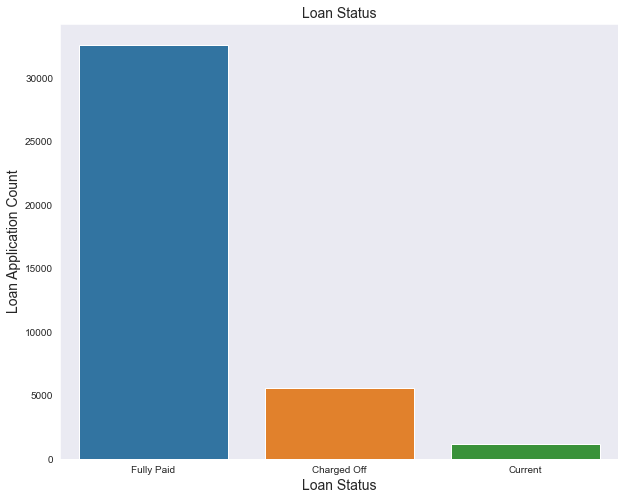

In [93]:
plt.figure(figsize=(10,8))
sns.set_style("dark")

plt_loan_status = sns.countplot(x="loan_status",data=loan_df)
plt_loan_status.set_title("Loan Status",fontsize=14)
plt_loan_status.set_xlabel("Loan Status",fontsize=14)
plt_loan_status.set_ylabel("Loan Application Count",fontsize=14)

plt.show()

## Univariate Analysis - Purpose Of Loan

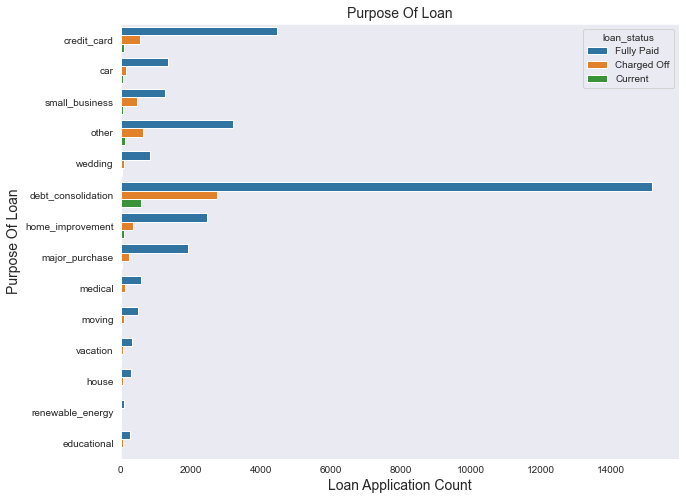

In [94]:
plt.figure(figsize=(10,8))
sns.set_style("dark")

plt_purpose = sns.countplot(y="purpose",data=loan_df,hue='loan_status')
plt_purpose.set_title("Purpose Of Loan",fontsize=14)
plt_purpose.set_ylabel("Purpose Of Loan",fontsize=14)
plt_purpose.set_xlabel("Loan Application Count",fontsize=14)

plt.show()

## Univariate Analysis - Home Ownership

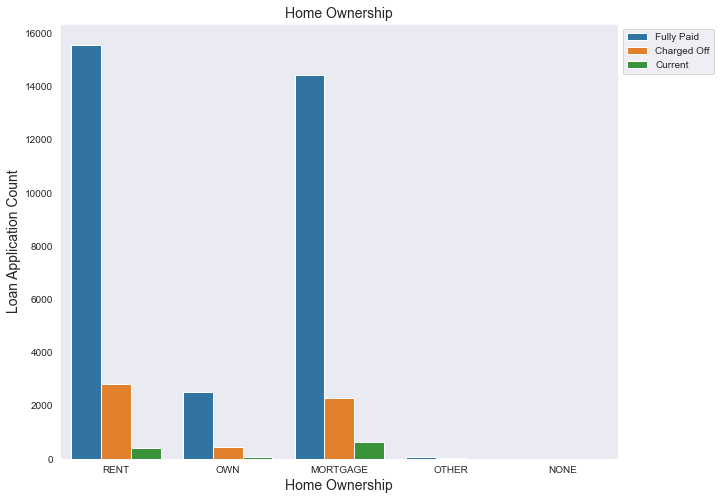

In [95]:
plt.figure(figsize=(10,8))

plt_home = sns.countplot(x="home_ownership",data=loan_df,hue='loan_status')
plt_home.legend(bbox_to_anchor=(1,1))
plt_home.set_title("Home Ownership",fontsize=14)
plt_home.set_xlabel("Home Ownership",fontsize=14)
plt_home.set_ylabel("Loan Application Count",fontsize=14)

plt.show()

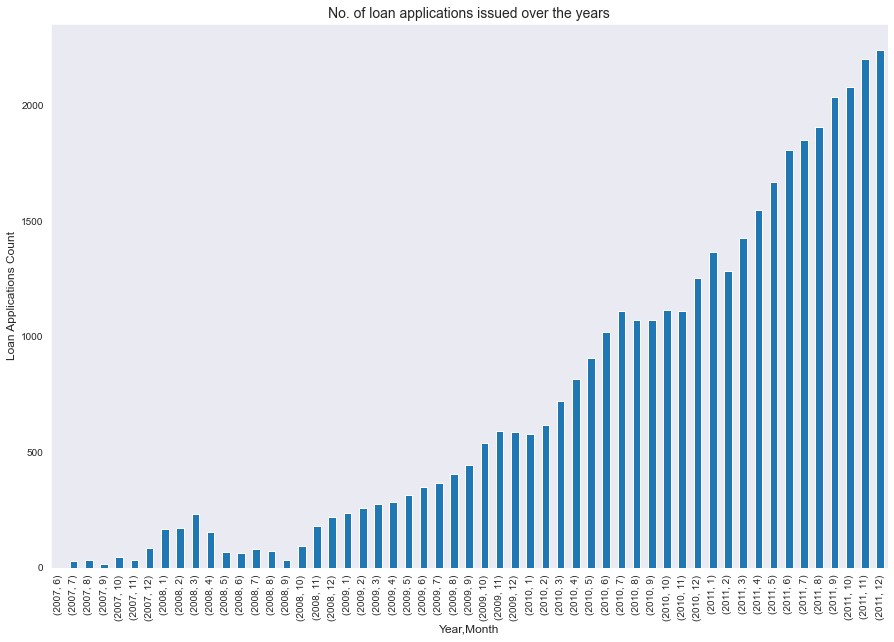

In [96]:
plt.figure(figsize=(15,10))
loan_df.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan Applications Count',fontsize=12)
plt.xlabel("Year,Month", fontsize=12)
plt.title("No. of loan applications issued over the years",fontsize=14)
plt.show()

## Univariate Analysis - Loan Paying Term

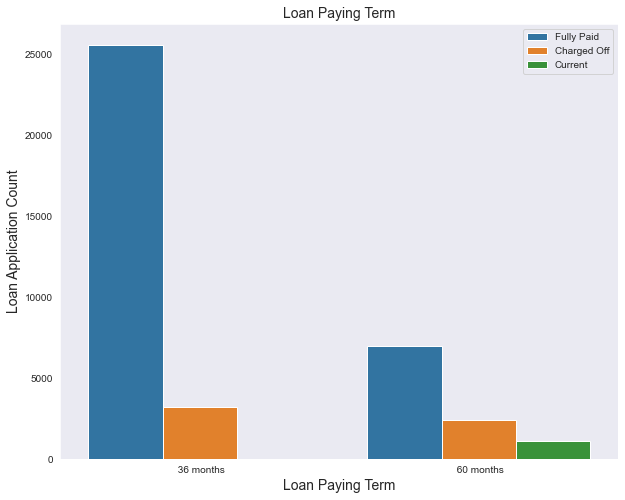

In [97]:
plt.figure(figsize=(10,8))

plt_home = sns.countplot(x="term",data=loan_df,hue='loan_status')
plt_home.legend(bbox_to_anchor=(1,1))
plt_home.set_title("Loan Paying Term",fontsize=14)
plt_home.set_xlabel("Loan Paying Term",fontsize=14)
plt_home.set_ylabel("Loan Application Count",fontsize=14)

plt.show()





# Bivariate Analysis

In [98]:
#Variable correspondence
loan_corr = loan_df.corr()
print(loan_corr)

                 loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt         1.000000     0.981566         0.939660  0.306502   
funded_amnt       0.981566     1.000000         0.958071  0.310198   
funded_amnt_inv   0.939660     0.958071         1.000000  0.304266   
int_rate          0.306502     0.310198         0.304266  1.000000   
installment       0.929720     0.955709         0.904120  0.280611   
emp_length        0.162464     0.161912         0.170586  0.017540   
annual_inc        0.415993     0.411176         0.394002  0.073150   
dti               0.075917     0.075616         0.083602  0.113924   
total_pymnt       0.885336     0.901830         0.879718  0.305093   
year              0.121797     0.132380         0.260648  0.054976   
month             0.067186     0.057798         0.084224  0.040325   

                 installment  emp_length  annual_inc       dti  total_pymnt  \
loan_amnt           0.929720    0.162464    0.415993  0.075917     0.885336   
f

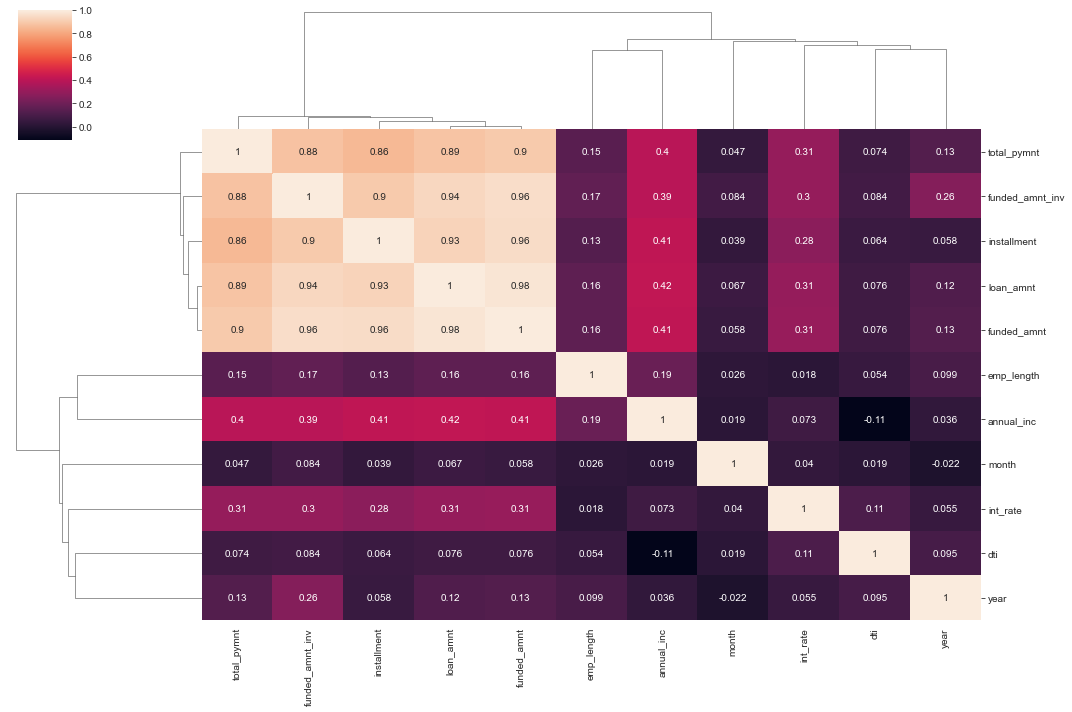

In [99]:
sns.clustermap(loan_corr,annot=True,figsize=(15,10))

In [100]:
#Dropping unnecessary columns which are not required for further analysis

columns_to_drop = ["initial_list_status","installment","application_type","policy_code",
                  "pymnt_plan"]

loan_df.drop(labels=columns_to_drop,axis=1,inplace=True)

In [101]:
loan_df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [102]:
loan_df.shape

(39319, 42)

## Derived Columns

In [103]:
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'],[0,7000,14000,21000,28000,35000],
                                  labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

In [104]:
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,1000000],
                                   labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

In [105]:
loan_df['dti_cats']=pd.cut(loan_df.dti,[0,5,10,15,20,25], labels=['0-5','5-10','10-15','15-20','25+'])

In [106]:
loan_df['int_rate_cats'] = pd.cut(loan_df['int_rate'],[0,10,14,18,20],labels=['0-10','10-14','14-18', '18+'])

In [107]:
loan_df.shape

(39319, 46)

In [108]:
loan_df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,dti_cats,int_rate_cats
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,...,171.62,May-16,0,0,2011,12,0-7000,20000-40000,NaN,10-14
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,1,RENT,...,119.66,Sep-13,0,0,2011,12,0-7000,20000-40000,0-5,14-18
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,10,RENT,...,649.91,May-16,0,0,2011,12,0-7000,0-20000,5-10,14-18
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,10,RENT,...,357.48,Apr-16,0,0,2011,12,7000-14000,40000-60000,15-20,10-14
4,1075358,3000,3000,3000.0,60 months,12.69,B,B5,1,RENT,...,67.79,May-16,0,0,2011,12,0-7000,60000-80000,15-20,10-14


## Bivariate Analysis - Annual Income against Chargedoff Proportion

In [109]:
inc_range_vs_loan = loan_df.groupby(["annual_inc_cats","loan_status"]).loan_status.count().unstack().fillna(0).reset_index()

In [110]:
inc_range_vs_loan["Total"] = inc_range_vs_loan["Charged Off"]+inc_range_vs_loan["Current"]+inc_range_vs_loan["Fully Paid"]
inc_range_vs_loan["ChargedOff_Proportion"] = inc_range_vs_loan["Charged Off"]/inc_range_vs_loan["Total"]
inc_range_vs_loan.sort_values("ChargedOff_Proportion",ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000+,1080,362,8531,9973,0.108292


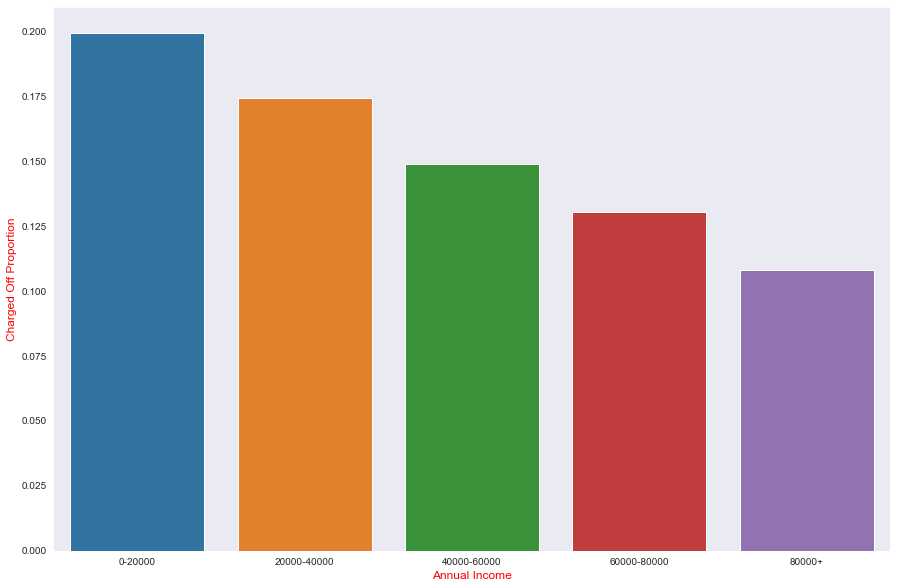

In [111]:
plt.figure(figsize=(15,10))
plt_annual_inc_vs_co = sns.barplot(x="annual_inc_cats",y="ChargedOff_Proportion",data=inc_range_vs_loan)
plt_annual_inc_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="r")
plt_annual_inc_vs_co.set_xlabel("Annual Income",fontsize=12,color="r")
plt.show()

## Bivariate Analysis - Purpose of loan against Charged off proportion

In [112]:
purpose_vs_loan = loan_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [113]:
purpose_vs_loan["Total"] = purpose_vs_loan["Charged Off"] + purpose_vs_loan["Current"] + purpose_vs_loan["Fully Paid"]
purpose_vs_loan["ChargedOff Proportion"] = purpose_vs_loan["Charged Off"]/purpose_vs_loan["Total"]
purpose_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
11,small_business,472.0,74.0,1251.0,1797.0,0.262660
10,renewable_energy,19.0,1.0,81.0,101.0,0.188119
3,educational,55.0,0.0,268.0,323.0,0.170279
9,other,629.0,126.0,3203.0,3958.0,0.158919
8,moving,91.0,7.0,479.0,577.0,0.157712
5,house,58.0,14.0,299.0,371.0,0.156334
7,medical,106.0,12.0,568.0,686.0,0.154519
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793


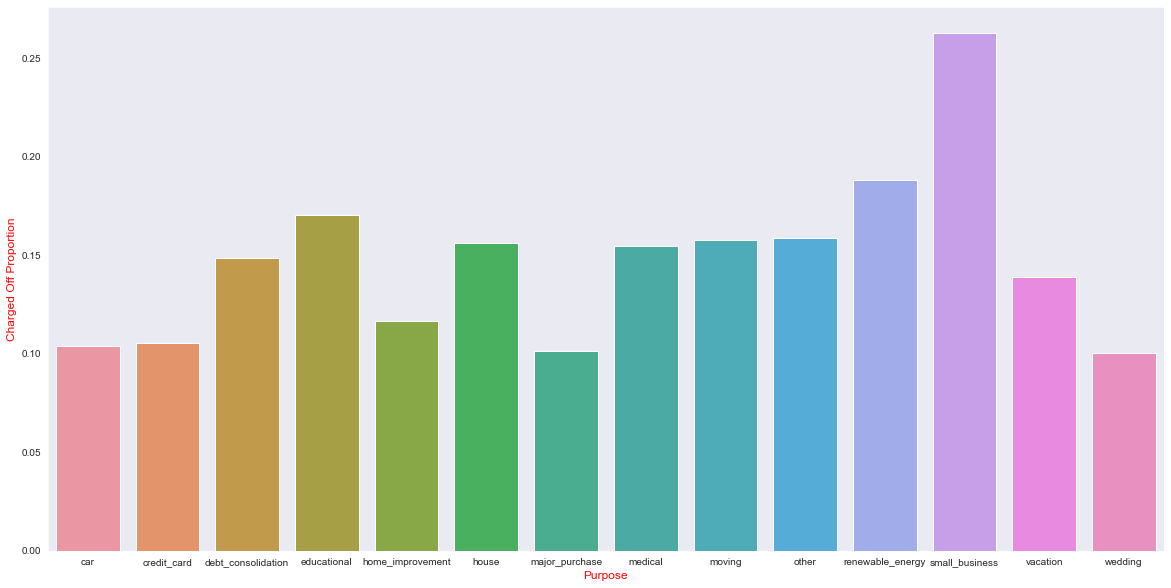

In [114]:
plt.figure(figsize=(20,10))
plt_purpose_vs_co = sns.barplot(x="purpose",y="ChargedOff Proportion",data=purpose_vs_loan)
plt_purpose_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="r")
plt_purpose_vs_co.set_xlabel("Purpose",fontsize=12,color="r")
plt.show()

## Bivariate Analysis - Grade against Charged off proportion

In [115]:
grade_vs_loan = loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan["Total"] = grade_vs_loan["Charged Off"] + grade_vs_loan["Current"] + grade_vs_loan["Fully Paid"]
grade_vs_loan["ChargedOff Proportion"] = grade_vs_loan["Charged Off"]/grade_vs_loan["Total"]
grade_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
6,G,99,17,190,306,0.323529
5,F,312,71,642,1025,0.304390
4,E,704,176,1906,2786,0.252692
3,D,1112,216,3916,5244,0.212052
2,C,1342,262,6411,8015,0.167436
1,B,1414,344,10167,11925,0.118574
0,A,601,40,9377,10018,0.059992


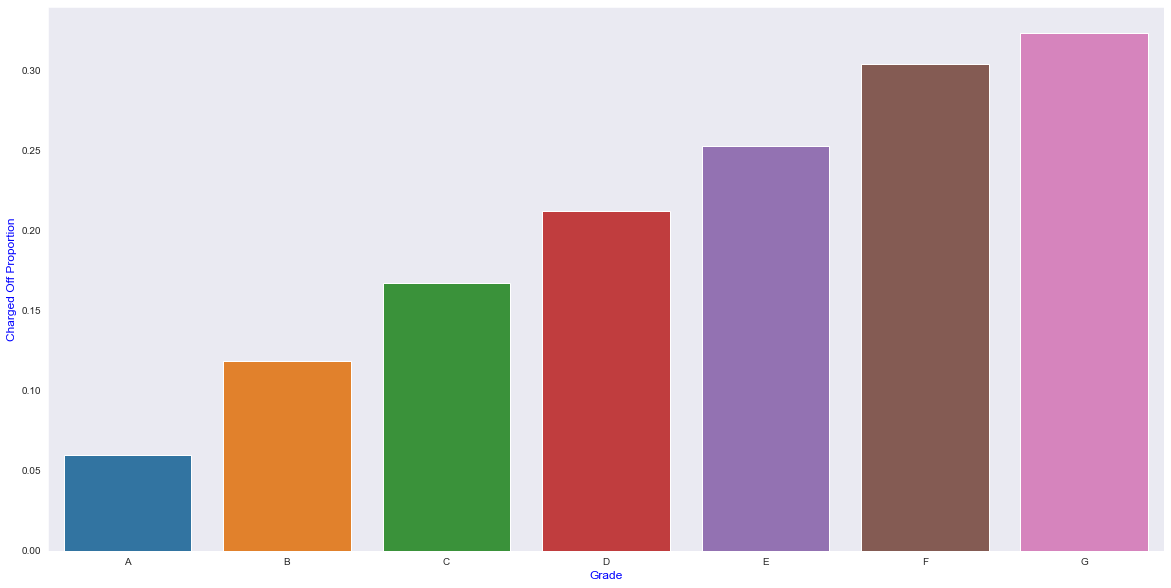

In [116]:
plt.figure(figsize=(20,10))
plt_grade_vs_co = sns.barplot(x="grade",y="ChargedOff Proportion",data=grade_vs_loan)
plt_grade_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_grade_vs_co.set_xlabel("Grade",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Sub Grades against Charged off proportion

In [117]:
subgrade_vs_loan = loan_df.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan["Total"] = subgrade_vs_loan["Charged Off"] + subgrade_vs_loan["Current"] + subgrade_vs_loan["Fully Paid"]
subgrade_vs_loan["ChargedOff Proportion"] = subgrade_vs_loan["Charged Off"]/subgrade_vs_loan["Total"]
subgrade_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
29,F5,53.0,4.0,55.0,112.0,0.473214
32,G3,19.0,3.0,25.0,47.0,0.404255
31,G2,27.0,1.0,47.0,75.0,0.360000
34,G5,10.0,1.0,18.0,29.0,0.344828
28,F4,52.0,17.0,96.0,165.0,0.315152
30,G1,31.0,10.0,61.0,102.0,0.303922
23,E4,126.0,28.0,293.0,447.0,0.281879
26,F2,69.0,16.0,162.0,247.0,0.279352
27,F3,50.0,11.0,118.0,179.0,0.279330
25,F1,88.0,23.0,211.0,322.0,0.273292


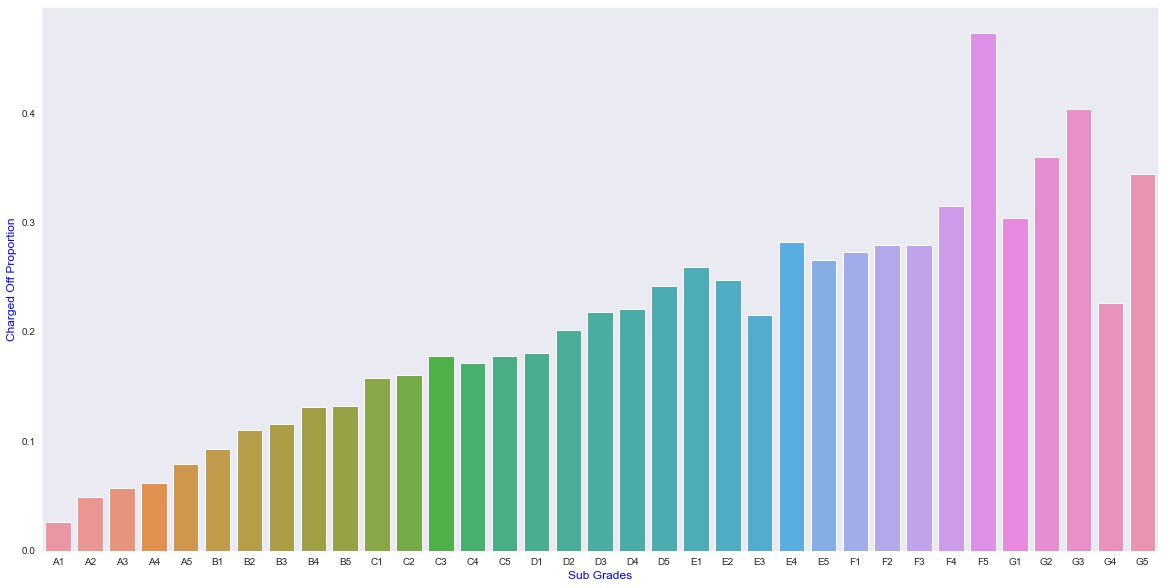

In [118]:
plt.figure(figsize=(20,10))
plt_subgrade_vs_co = sns.barplot(x="sub_grade",y="ChargedOff Proportion",data=subgrade_vs_loan)
plt_subgrade_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_subgrade_vs_co.set_xlabel("Sub Grades",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Interest Rate against Charged Off Proportion

In [119]:
intrate_vs_loan = loan_df.groupby(['int_rate_cats','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intrate_vs_loan["Total"] = intrate_vs_loan["Charged Off"] + intrate_vs_loan["Current"] + intrate_vs_loan["Fully Paid"]
intrate_vs_loan["ChargedOff Proportion"] = intrate_vs_loan["Charged Off"]/intrate_vs_loan["Total"]
intrate_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
3,18+,436,162,1012,1610,0.270807
2,14-18,1815,349,6490,8654,0.209730
1,10-14,2218,438,13252,15908,0.139427
0,0-10,825,77,11403,12305,0.067046


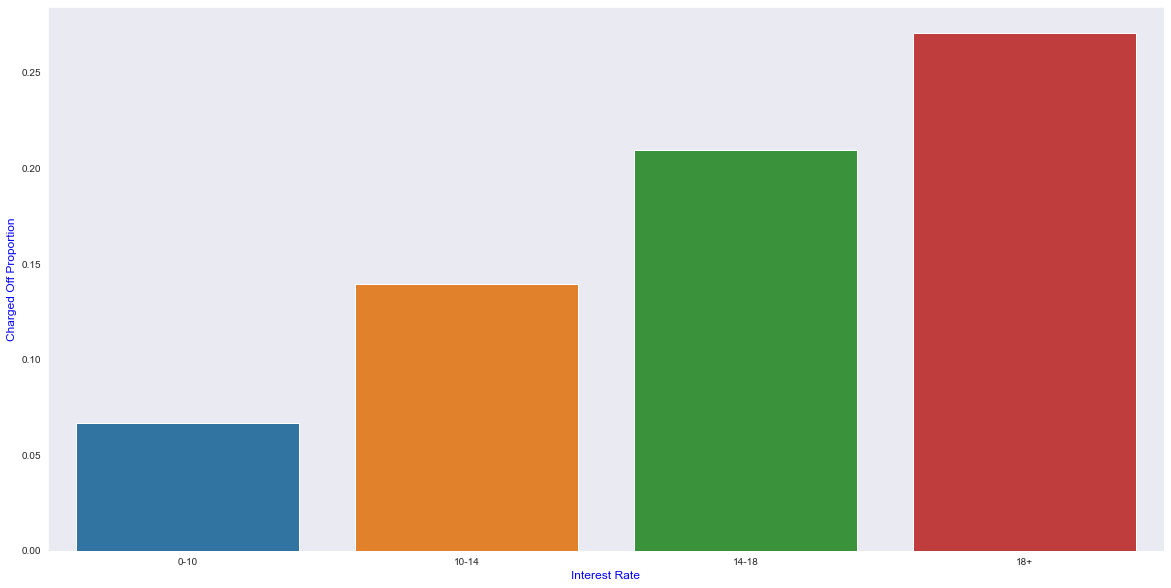

In [120]:
plt.figure(figsize=(20,10))
plt_intrate_vs_co = sns.barplot(x="int_rate_cats",y="ChargedOff Proportion",data=intrate_vs_loan)
plt_intrate_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_intrate_vs_co.set_xlabel("Interest Rate",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Employment Length against ChargedOff Proportion

In [121]:
emplength_vs_loan = loan_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplength_vs_loan["Total"] = emplength_vs_loan["Charged Off"] + emplength_vs_loan["Current"] + emplength_vs_loan["Fully Paid"]
emplength_vs_loan["ChargedOff Proportion"] = emplength_vs_loan["Charged Off"]/emplength_vs_loan["Total"]
emplength_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
0,0,227,42,801,1070,0.212150
10,10,1316,386,7038,8740,0.150572
7,7,262,62,1435,1759,0.148948
1,1,1090,143,6533,7766,0.140355
5,5,456,87,2712,3255,0.140092
8,8,203,43,1216,1462,0.138851
6,6,305,58,1846,2209,0.138072
3,3,551,82,3426,4059,0.135748
4,4,456,94,2860,3410,0.133724
2,2,561,97,3684,4342,0.129203


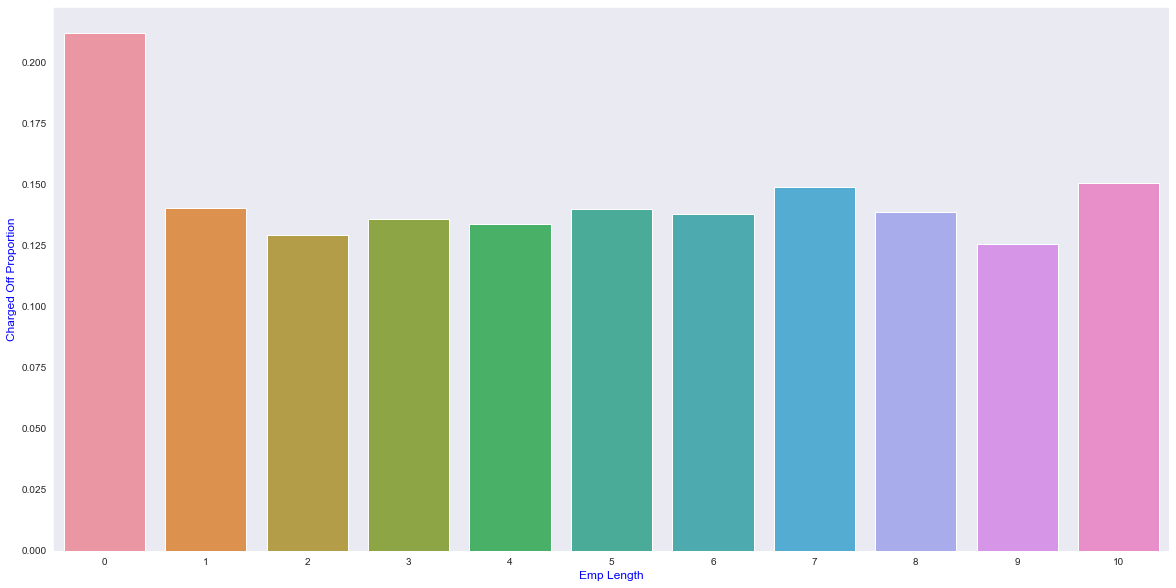

In [122]:
plt.figure(figsize=(20,10))
plt_emplength_vs_co = sns.barplot(x="emp_length",y="ChargedOff Proportion",data=emplength_vs_loan)
plt_emplength_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_emplength_vs_co.set_xlabel("Emp Length",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Address State against Charged Off Proportion

In [123]:
state_vs_loan = loan_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan["Total"] = state_vs_loan["Charged Off"] + state_vs_loan["Current"] + state_vs_loan["Fully Paid"]
state_vs_loan["ChargedOff Proportion"] = state_vs_loan["Charged Off"]/state_vs_loan["Total"]
state_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,107.0,17.0,368.0,492.0,0.217480
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,14.0,2.0,63.0,79.0,0.177215
9,FL,497.0,85.0,2252.0,2834.0,0.175371
24,MO,114.0,16.0,551.0,681.0,0.167401
13,ID,1.0,0.0,5.0,6.0,0.166667
31,NM,30.0,5.0,149.0,184.0,0.163043
11,HI,28.0,8.0,138.0,174.0,0.160920
4,CA,1116.0,149.0,5767.0,7032.0,0.158703


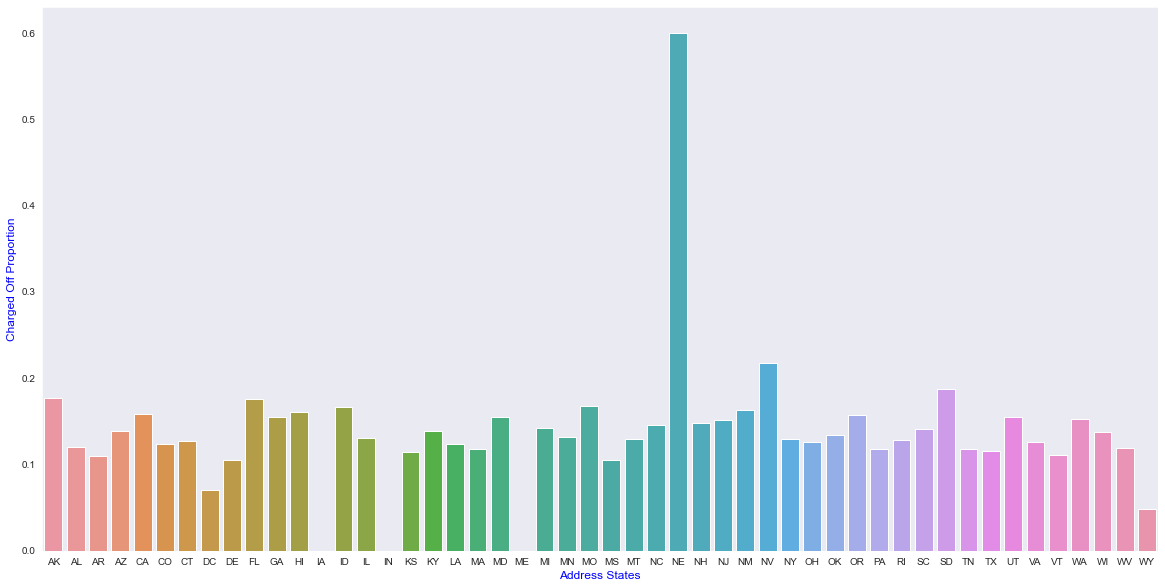

In [124]:
plt.figure(figsize=(20,10))
plt_state_vs_co = sns.barplot(x="addr_state",y="ChargedOff Proportion",data=state_vs_loan)
plt_state_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_state_vs_co.set_xlabel("Address States",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Verification Status against Charged Off Proportion

In [125]:
verstatus_vs_loan = loan_df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verstatus_vs_loan["Total"] = verstatus_vs_loan["Charged Off"] + verstatus_vs_loan["Current"] + verstatus_vs_loan["Fully Paid"]
verstatus_vs_loan["ChargedOff Proportion"] = verstatus_vs_loan["Charged Off"]/verstatus_vs_loan["Total"]
verstatus_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
2,Verified,2032,593,10000,12625,0.160950
1,Source Verified,1422,306,8135,9863,0.144175
0,Not Verified,2130,227,14474,16831,0.126552


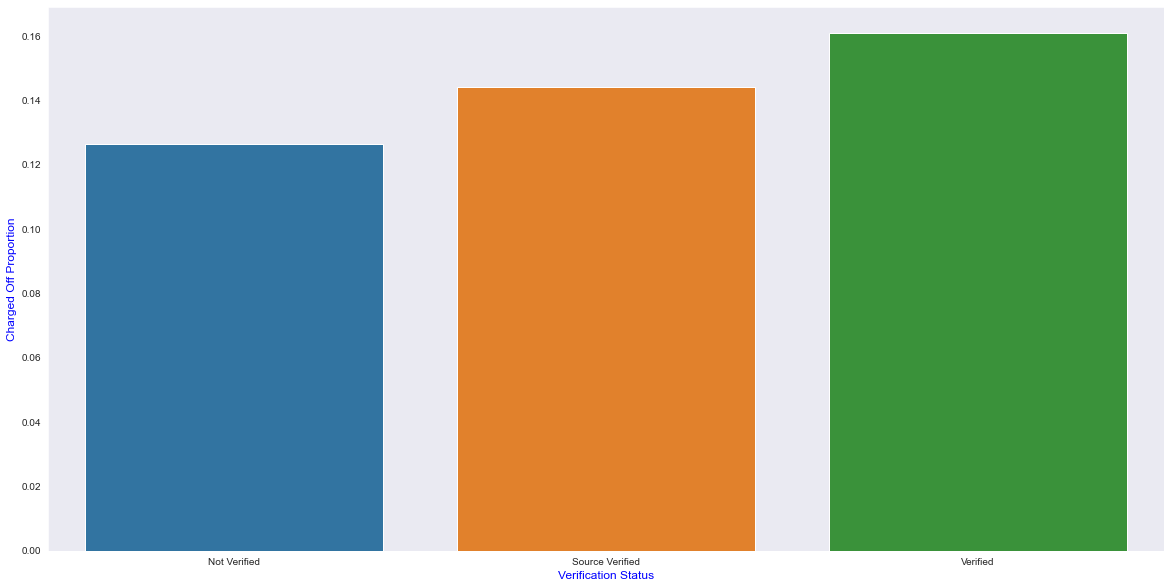

In [127]:
plt.figure(figsize=(20,10))
plt_verstatus_vs_co = sns.barplot(x="verification_status",y="ChargedOff Proportion",data=verstatus_vs_loan)
plt_verstatus_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_verstatus_vs_co.set_xlabel("Verification Status",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Bank Ruptcie against Charged Off

In [128]:
bankruptcie_vs_loan = loan_df.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcie_vs_loan["Total"] = bankruptcie_vs_loan["Charged Off"] + bankruptcie_vs_loan["Current"] + bankruptcie_vs_loan["Fully Paid"]
bankruptcie_vs_loan["ChargedOff Proportion"] = bankruptcie_vs_loan["Charged Off"]/bankruptcie_vs_loan["Total"]
bankruptcie_vs_loan.sort_values("ChargedOff Proportion",ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,ChargedOff Proportion
2,2,2.0,2.0,3.0,7.0,0.285714
1,1,365.0,37.0,1268.0,1670.0,0.218563
3,Not Known,116.0,0.0,572.0,688.0,0.168605
0,0,5101.0,1087.0,30766.0,36954.0,0.138036


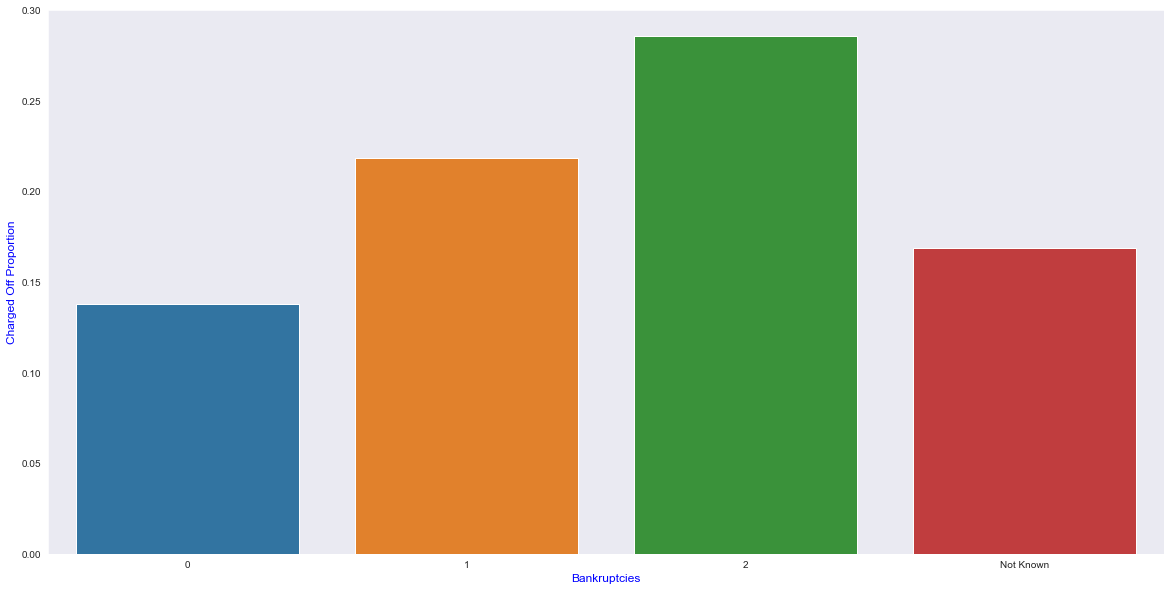

In [129]:
plt.figure(figsize=(20,10))
plt_bankruptcie_vs_co = sns.barplot(x="pub_rec_bankruptcies",y="ChargedOff Proportion",data=bankruptcie_vs_loan)
plt_bankruptcie_vs_co.set_ylabel("Charged Off Proportion",fontsize=12,color="b")
plt_bankruptcie_vs_co.set_xlabel("Bankruptcies",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Box Plot - Purpose Of Loan vs Loan Amount

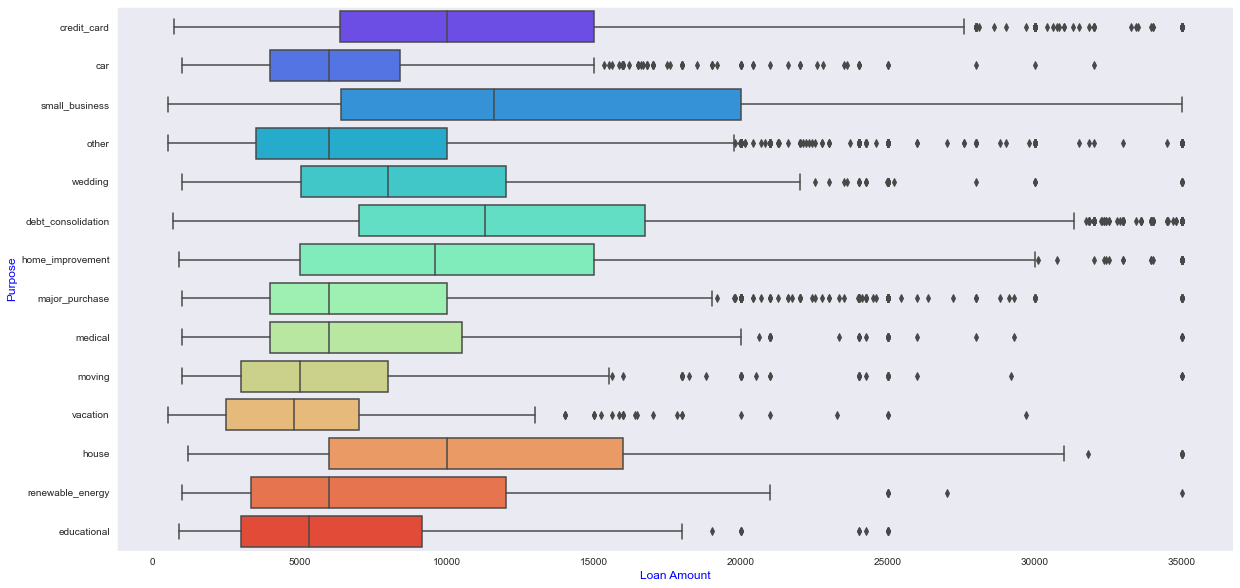

In [130]:
plt.figure(figsize=(20,10))
bxplt_purpose_vs_loan = sns.boxplot(y="purpose",x="loan_amnt",data=loan_df,palette='rainbow')
bxplt_purpose_vs_loan.set_xlabel("Loan Amount",fontsize=12,color="b")
bxplt_purpose_vs_loan.set_ylabel("Purpose",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Box Plot - Term Of Loan vs Interest Rate

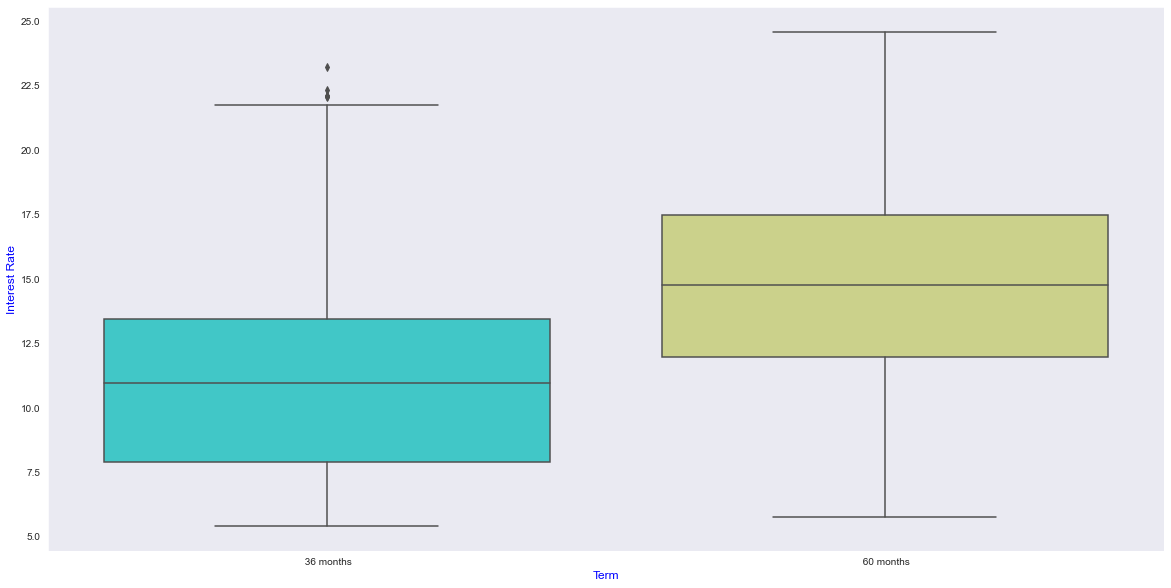

In [131]:
plt.figure(figsize=(20,10))
bxplt_intrate_vs_term = sns.boxplot(y="int_rate",x="term",data=loan_df,palette='rainbow')
bxplt_intrate_vs_term.set_xlabel("Term",fontsize=12,color="b")
bxplt_intrate_vs_term.set_ylabel("Interest Rate",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Box Plot - Purpose vs Interest Rate

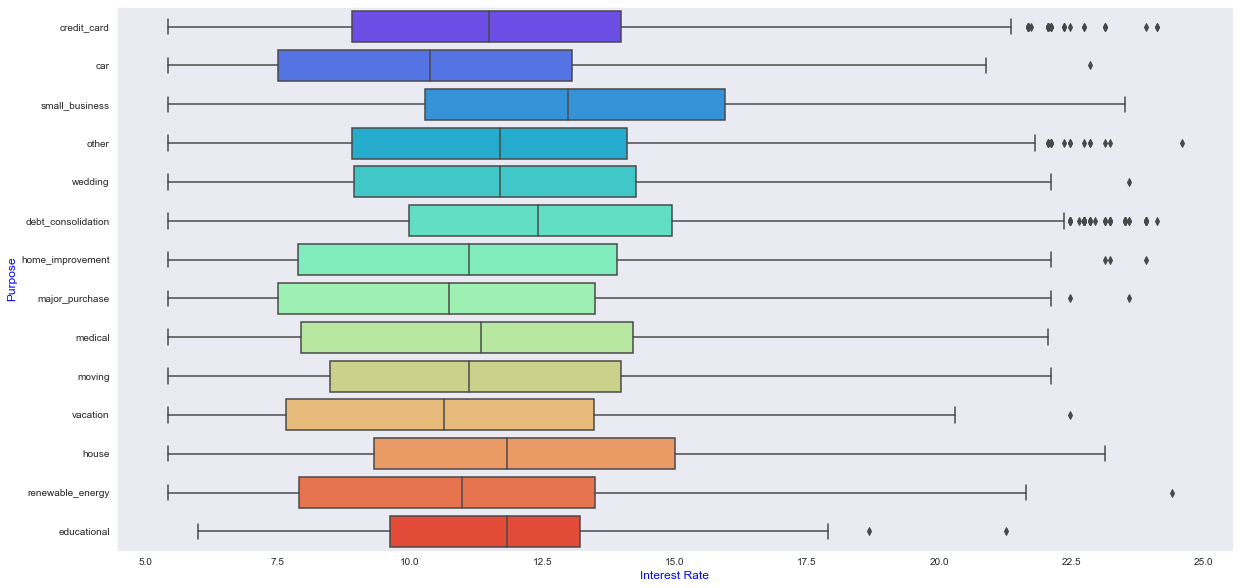

In [132]:
plt.figure(figsize=(20,10))
bxplt_intrate_vs_purpose = sns.boxplot(x="int_rate",y="purpose",data=loan_df,palette='rainbow')
bxplt_intrate_vs_purpose.set_ylabel("Purpose",fontsize=12,color="b")
bxplt_intrate_vs_purpose.set_xlabel("Interest Rate",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Box Plot - Grade vs Interest Rate

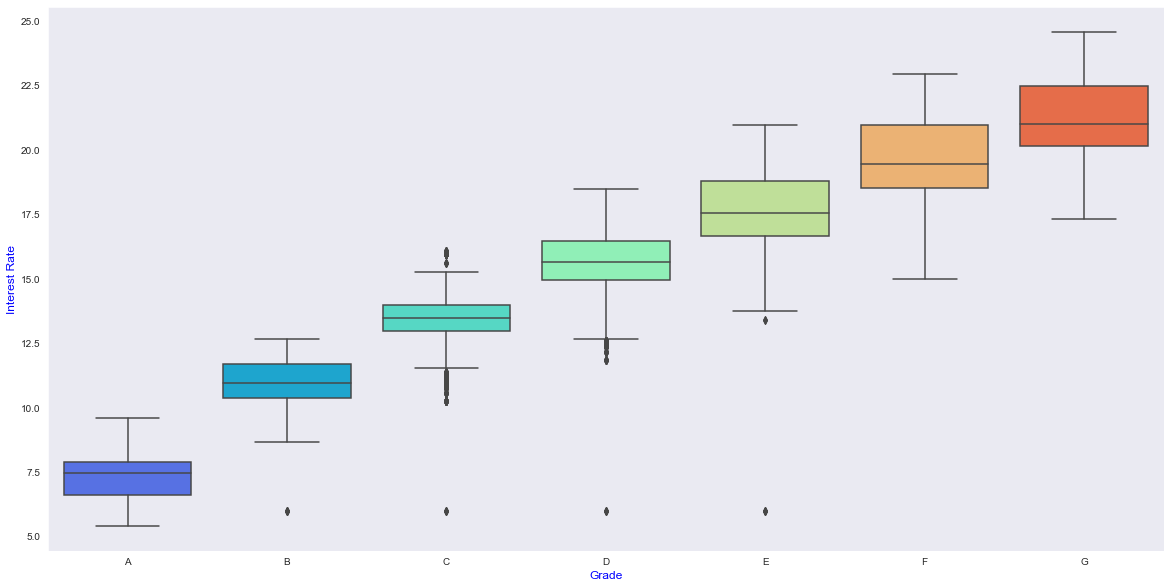

In [133]:
plt.figure(figsize=(20,10))
bxplt_intrate_vs_term = sns.boxplot(y="int_rate",x="grade",data=loan_df,order='ABCDEFG',palette='rainbow')
bxplt_intrate_vs_term.set_xlabel("Grade",fontsize=12,color="b")
bxplt_intrate_vs_term.set_ylabel("Interest Rate",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Box Plot - Recoveries vs Annual Income

In [134]:
loan_df['recoveries'] = pd.to_numeric(loan_df['recoveries'],errors ='coerce')
loan_df_rec=loan_df[loan_df['recoveries'] > 0]

In [135]:
loan_df['recoveries'].head(5)

0      0.00
1    117.08
2      0.00
3      0.00
4      0.00
Name: recoveries, dtype: float64

In [136]:
loan_df_rec.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,dti_cats,int_rate_cats
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,1,RENT,...,119.66,Sep-13,0,0,2011,12,0-7000,20000-40000,0-5,14-18
8,1071795,5600,5600,5600.0,60 months,21.28,F,F2,4,OWN,...,152.39,Aug-12,0,0,2011,12,0-7000,20000-40000,5-10,NaN
9,1071570,5375,5375,5350.0,60 months,12.69,B,B5,1,RENT,...,121.45,Mar-13,0,0,2011,12,0-7000,0-20000,15-20,10-14
12,1064687,9000,9000,9000.0,36 months,13.49,C,C1,1,RENT,...,305.38,Nov-12,0,0,2011,12,7000-14000,20000-40000,10-15,10-14
14,1069057,10000,10000,10000.0,36 months,10.65,B,B2,3,RENT,...,325.74,Mar-14,0,0,2011,12,7000-14000,80000+,5-10,10-14


In [137]:
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt'])*100)
loan_df_rec['recovery_prcnt'].head(5)

<ipython-input-137-5d378f254f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt'])*100)


1     4.683200
8     3.376071
9     5.010047
12    4.936667
14    6.451000
Name: recovery_prcnt, dtype: float64

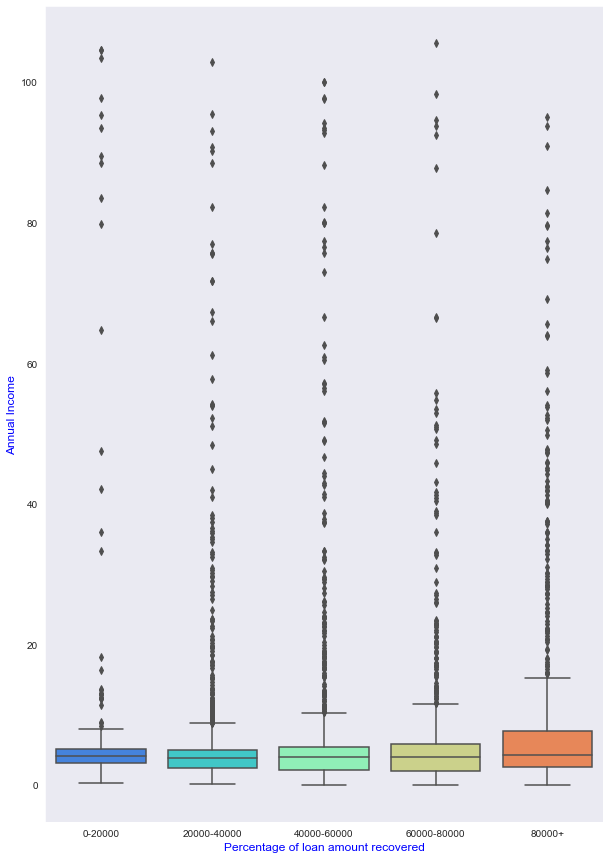

In [138]:
plt.figure(figsize=(10,15))
bxplt_recovery_prcnt = sns.boxplot(y="recovery_prcnt",x="annual_inc_cats",data=loan_df_rec,palette='rainbow')
bxplt_recovery_prcnt.set_xlabel("Percentage of loan amount recovered",fontsize=12,color="b")
bxplt_recovery_prcnt.set_ylabel("Annual Income",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Bar Plot - Annual Income vs Grade

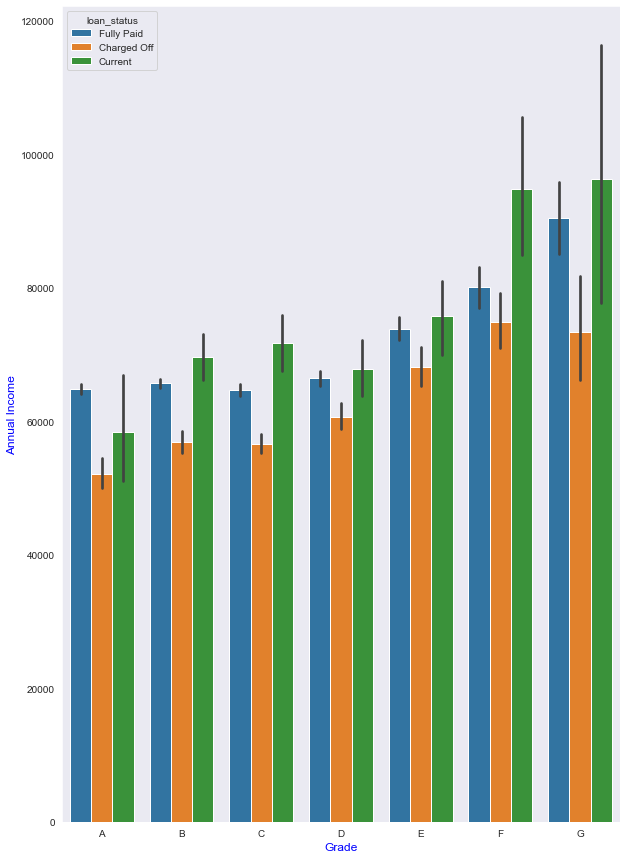

In [139]:
plt.figure(figsize=(10,15))
bxplt_grade_vs_ai = sns.barplot(y="annual_inc",x="grade",data=loan_df,estimator=np.mean,hue='loan_status',order='ABCDEFG')
bxplt_grade_vs_ai.set_xlabel("Grade",fontsize=12,color="b")
bxplt_grade_vs_ai.set_ylabel("Annual Income",fontsize=12,color="b")
plt.show()

## Bivariate Analysis - Year vs Interest Rate

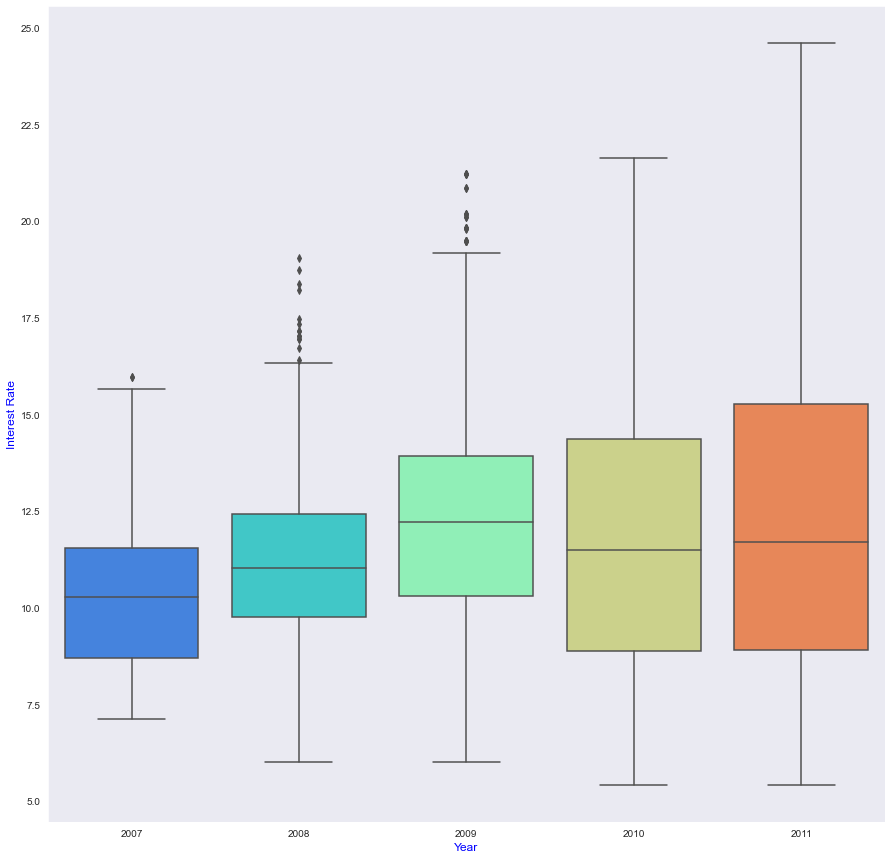

In [140]:
plt.figure(figsize=(15,15))
bxplt_year_vs_interestrate = sns.boxplot(y="int_rate",x="year",data=loan_df,palette='rainbow')
bxplt_year_vs_interestrate.set_xlabel("Year",fontsize=12,color="b")
bxplt_year_vs_interestrate.set_ylabel("Interest Rate",fontsize=12,color="b")
plt.show()

# Multivariate Analysis

In [141]:
# Pair plots for important columns

imp_cols = loan_df[['loan_amnt','annual_inc','year','int_rate','loan_status']].copy()
imp_cols.head(5)

,loan_amnt,annual_inc,year,int_rate,loan_status
0,5000,24000.0,2011,10.65,Fully Paid
1,2500,30000.0,2011,15.27,Charged Off
2,2400,12252.0,2011,15.96,Fully Paid
3,10000,49200.0,2011,13.49,Fully Paid
4,3000,80000.0,2011,12.69,Current


In [142]:
#Taking log of selected columns as they are heavily skewed

imp_cols.loan_amnt=np.log10(imp_cols.loan_amnt)
imp_cols.annual_inc=np.log10(imp_cols.annual_inc)
imp_cols.int_rate=np.log10(imp_cols.int_rate)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


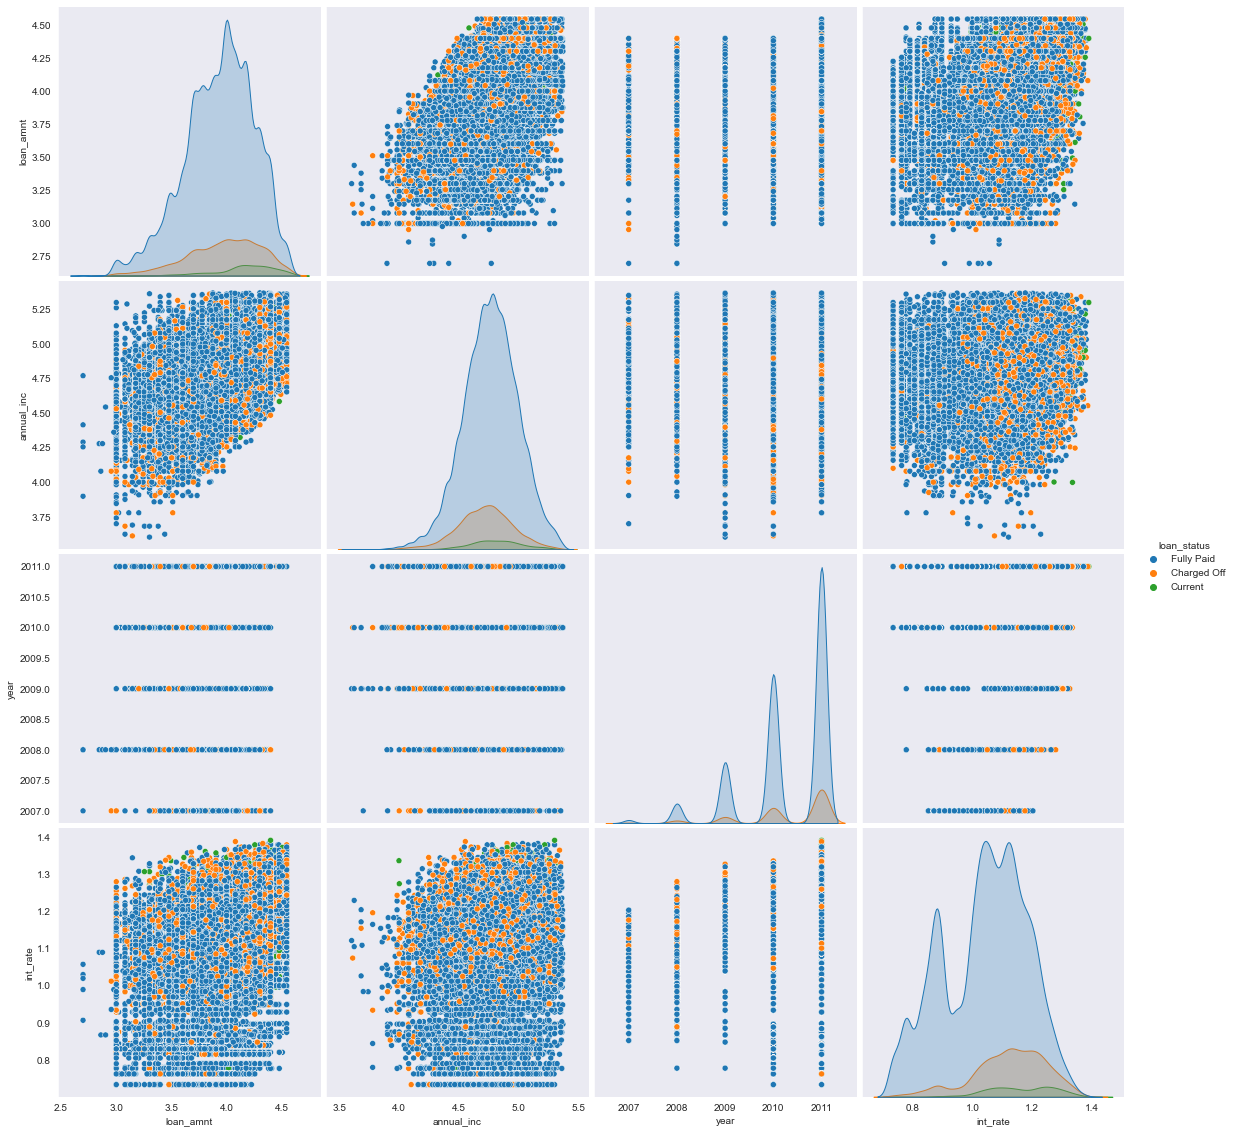

In [144]:
#Creating Pair plot of selected columns

sns.pairplot(imp_cols,hue='loan_status',diag_kind='kde',height=4)
plt.show()